# Guided Project: Building A Handwritten Digits Classifier (image classification)

In [26]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

%matplotlib inline

In [27]:
digits_data=load_digits()

In [28]:
digits_data.keys()

dict_keys(['target_names', 'data', 'DESCR', 'target', 'images'])

In [29]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


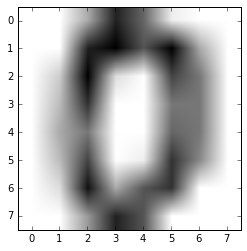

In [30]:
first_image = data.iloc[0]
np_image = first_image.values
print(np_image)
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

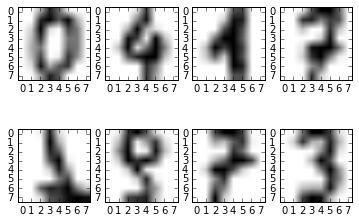

In [31]:
f, axarr = plt.subplots(2, 4)
axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

# K ближайших соседей

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5, random_state=1)

In [33]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn
    
def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy




def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy  = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [34]:
knn_one_accuracies= cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

In [35]:
k=[1,2,3,4,5,6,7,8,9]
a=[]
for i in k:
    knn_one_accuracies = cross_validate(i)
    a.append(np.mean(knn_one_accuracies))
a

[0.9677233358079684,
 0.9616010888393962,
 0.9627183865379857,
 0.9649480326651819,
 0.9621665429349171,
 0.9588270230141054,
 0.9571591190299431,
 0.9571578817124474,
 0.9543801039346697]

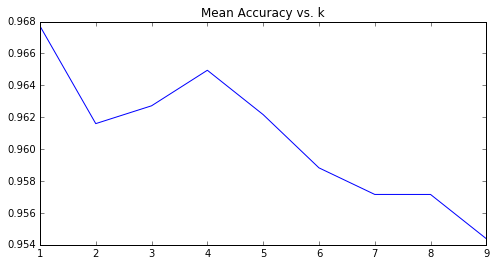

In [36]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k, a)
plt.show()

# Нейросеть MLPClassifier с одним слоем

In [ ]:
def train_nn(ner, train_features, train_labels):
    model=MLPClassifier(hidden_layer_sizes=(ner,))
    model.fit(train_features, train_labels)
    return model
    
def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy




def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
neurons=[8,16,32,64,128,256]
b=[]
for i in neurons:
    knn_one_accuracies = cross_validate(i)
    b.append(np.mean(knn_one_accuracies))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [ ]:
b

[0.8597550111358575,
 0.9204243999010145,
 0.9371034397426379,
 0.9393392724573126,
 0.944902251917842,
 0.9476849789656026]

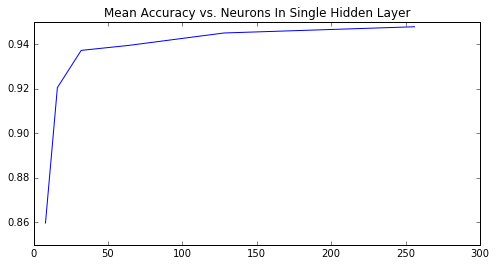

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, b)
plt.show()

**Резюме:**
Похоже, что добавление большего количества нейронов в один скрытый слой помогло значительно повысить точность простых данных - с примерно 86% до примерно 94%. Простая точность вычисляет количество правильных классификаций, сделанных моделью, но не говорит нам ничего о ложных или истинных положительных или ложных или истинных отрицательных значениях.

Принимая во внимание, что k-ближайшие соседи достигли точности приблизительно 96%, кажется, нет никаких преимуществ использования нейронной сети с одним скрытым слоем для этой проблемы.

# Нейросеть MLPClassifier с двумя слоями

In [ ]:
def train_nn_2(ner, train_features, train_labels):
    model=MLPClassifier(hidden_layer_sizes=(ner,ner))
    model.fit(train_features, train_labels)
    return model
    
def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy




def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn_2(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
knn_one_accuracies = cross_validate(64)

In [ ]:
neurons=[8,16,32,64,128,256]
с=[]
for i in neurons:
    knn_one_accuracies = cross_validate(i)
    с.append(np.mean(knn_one_accuracies))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



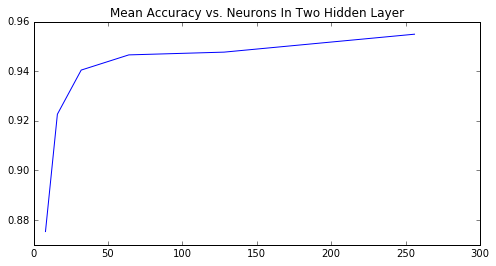

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layer")
plt.plot(neurons, с)
plt.show()

# Нейросеть MLPClassifier с тремя слоями

In [ ]:
def train_nn_3(ner, train_features, train_labels):
    model=MLPClassifier(hidden_layer_sizes=(ner,ner,ner))
    model.fit(train_features, train_labels)
    return model
    
def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy




def cross_validate_6(k):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn_3(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
neurons_3=[10,16,32,64,128,256]
d=[]
for i in neurons:
    knn_one_accuracies = cross_validate_6(i)
    d.append(np.mean(knn_one_accuracies))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



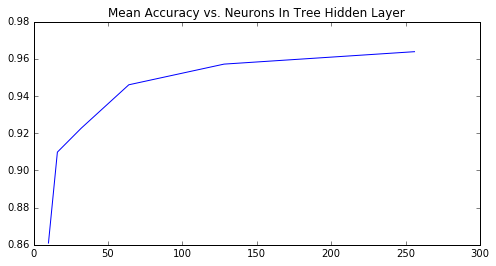

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Tree Hidden Layer")
plt.plot(neurons_3, d)
plt.show()